In [31]:
# inspired by this paper's code 
# Unsupervised speech recognition through spike-timing-dependent plasticity in a convolutional spiking neural network


from python_speech_features import fbank
import numpy as np 
import scipy.io.wavfile as wav 
import os 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import pandas as pd 
from sklearn.utils import shuffle




def read_the_csv():
    n_bands = 41
    n_frames = 40
    overlap = 0.5


    datasets = pd.read_csv('data.csv')
    print(len(datasets))
    
    datasets = shuffle(datasets)
    n_samples = len(datasets)

    feats = np.empty((n_samples, n_bands * n_frames))
    labels = np.empty((n_samples,), dtype=np.uint8)
    
    
    for i in range(n_samples):
        label = datasets['label'].iloc[i]
        file = datasets['filename'].iloc[i]
        labels[i] = np.uint8(label)

        rate , sig = wav.read(file)
        duration = sig.size / rate
        winlen = duration /(n_frames * (1 - overlap) + overlap)
        winstep = winlen * (1 - overlap)

        feat, energy = fbank(sig, rate, winlen, winstep, 
        nfilt=n_bands, nfft=4096, winfunc=np.hamming)

        feat = np.log(feat)
        
        feats[i] = feat[:n_frames].flatten()
    
    feats = normalize(feats, norm = 'l2', axis=1)

    np.random.seed(42)
    np.random.shuffle(feats)
    p = np.random.permutation(n_samples)
    feats, labels[p], labels[p]

    n_train_sample = int(n_samples * 0.7)

    train_set = (feats[:n_train_sample], labels[:n_train_sample])
    test_set = (feats[n_train_sample:], labels[n_train_sample:])


    return train_set, test_set

train, test = read_the_csv()

2000


In [32]:
train_labels = train[1]
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [33]:
test_labels = test[1]
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [34]:
train[1].shape

(1400,)

In [35]:
test[1].shape

(600,)

In [59]:
idx = 32
number = train[0][idx]
number

array([0.00555705, 0.01524183, 0.02082119, ..., 0.01819982, 0.02260787,
       0.02249649])

In [60]:
label = train[1][idx]
label

0

In [61]:
train[0][431]

array([0.0166528 , 0.01362038, 0.0195329 , ..., 0.02297818, 0.02476393,
       0.02553035])

In [62]:
def plot_digit(feature, label):
    number = feature
    label = label

    number = np.reshape(number,[40,41])
    number = number.transpose()

    plt.imshow(number)
    plt.show()
    
    return number 

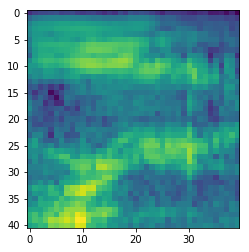

In [63]:
number = plot_digit(number, label)

In [64]:
number.shape

(41, 40)

In [65]:
np.max(number)

0.04893183673356941

In [66]:
np.min(number)

-0.0012742120401629368

In [67]:
pixel = np.array([0.03695778142231365,0.010157986041226467, 0, 0])

In [68]:
pixel

array([0.03695778, 0.01015799, 0.        , 0.        ])

In [69]:
pixel = np.reshape(pixel,(2,2))
pixel

array([[0.03695778, 0.01015799],
       [0.        , 0.        ]])

In [70]:
number

array([[ 0.00555705,  0.00814551,  0.00937076, ...,  0.00055355,
         0.00443626, -0.00127421],
       [ 0.01524183,  0.01850967,  0.01986303, ...,  0.0088997 ,
         0.00939776,  0.00744362],
       [ 0.02082119,  0.02441724,  0.02554351, ...,  0.01304897,
         0.01052309,  0.01160333],
       ...,
       [ 0.03076372,  0.03401965,  0.02982076, ...,  0.02000245,
         0.01824586,  0.01819982],
       [ 0.03041554,  0.03433379,  0.03295146, ...,  0.02287909,
         0.02088673,  0.02260787],
       [ 0.02718004,  0.02943179,  0.03222971, ...,  0.02221438,
         0.01982427,  0.02249649]])

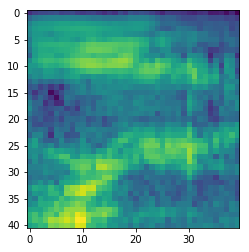

In [71]:
plt.imshow(number)